# **Project 3 Code and Visualizations**

The following code provides the workflow, functions, analysis, and insights into Project 3 for group Ernst Engel

Project Members: Allison Nguyen, Fari Santoso, Katy Qin, Johann Dicken, Shrija Malla, Avani Agarwal 


# Table of Contents

- **Deliverable [A] - Population of Interest**
- **Data Setup**
- **Data Filtering**
- **Estimation**

- **Gamma Visualizations**

- **Sorted Gamma Visualizations**

- **Deliverable [B] - Nutritional Content**

- **Deliverable [B] - Nutritional Adaquacy**



To run this code you well need the `CFEDemands` python
module.



In [1]:
!pip install -r requirements.txt

  Using cached cfedemands-0.6.4.dev0-py2.py3-none-any.whl.metadata (1.6 kB)
  Using cached ConsumerDemands-0.4.3.dev0-py2.py3-none-any.whl.metadata (1.2 kB)
  Using cached eep153_tools-0.12.4-py2.py3-none-any.whl.metadata (363 bytes)
  Using cached python_gnupg-0.5.4-py2.py3-none-any.whl.metadata (2.0 kB)
  Using cached gspread_pandas-3.3.0-py2.py3-none-any.whl.metadata (10 kB)
  Using cached fsspec-2025.3.2-py3-none-any.whl.metadata (11 kB)
Using cached cfedemands-0.6.4.dev0-py2.py3-none-any.whl (45 kB)
Using cached ConsumerDemands-0.4.3.dev0-py2.py3-none-any.whl (12 kB)
Using cached eep153_tools-0.12.4-py2.py3-none-any.whl (4.9 kB)
Using cached python_gnupg-0.5.4-py2.py3-none-any.whl (21 kB)
Using cached gspread_pandas-3.3.0-py2.py3-none-any.whl (27 kB)
Using cached fsspec-2025.3.2-py3-none-any.whl (194 kB)
  Attempting uninstall: gspread_pandas
    Found existing installation: gspread-pandas 2.2.3
    Uninstalling gspread-pandas-2.2.3:
      Successfully uninstalled gspread-pandas-2

**Deliverable [A] - Population of Interest**

Our primary population of interest is the elderly population, defined as those above the age of 50 in 4 African countries: Uganda, Tanzania, Mali, and Senegal

**Data Setup**



In [2]:
import pandas as pd
import numpy as np
from eep153_tools.sheets import read_sheets

In [3]:
Uganda_Data = '1yFWlP5N7Aowaj6t2roRSFFUC50aFD-RLBGfzGtqLl0w'
Tanzania_Data = '1tlNUxe2hY2DAOsv6u7R7yC_CiBcr05cXXQiRWBlEHEo'
Senegal_Data = '1cCszXB2Irc1Dp9zyIQgeu4OVWy9ZqvJbTielK8h9PLk'
Mali_Data = '1FnbKj5gwoAQb0QSunBQmyExHwaiLEAdAFCxL59SWLyg'

In [4]:
mali_sheet_names = {
        "expenditures": "Food Expenditures (2018-19)",
        "prices": "Food Prices (2018-19)",
        "household": "Household Characteristics"
    }

In [5]:
def load_country_data(sheet_key, sheet_names = None):

    if sheet_names == None:
        sheet_names = {
        "expenditures": "Food Expenditures (2019-20)",
        "prices": "Food Prices (2019-20)",
        "household": "Household Characteristics"
        }

    # Read expenditures
    x = read_sheets(sheet_key, sheet=sheet_names["expenditures"])
    x = x.set_index(['i','t','m','j']).squeeze()

    # Read prices
    p = read_sheets(sheet_key, sheet=sheet_names["prices"]).set_index(['t','m','j','u'])
    p = p.groupby(['t','m','j','u']).median()  # Median price
    p.index = p.index.set_levels(p.index.levels[-1].str.lower(), level='u')

    p = p.xs('kg', level='u').squeeze().unstack('j')  # Just kg prices
    common_goods = p.columns.intersection(x.index.levels[-1])
    p = p[common_goods].T


    # Read household characteristics
    d = read_sheets(sheet_key, sheet=sheet_names["household"])
    d.columns.name = 'k'
    d = d.replace(np.nan, 0)  # Fill blanks with zero

    #filter data
    

    # Process expenditures
    x = x.T.groupby(['i','t','m','j']).sum()
    x = x.replace(0, np.nan)  # Replace zero with missing
    y = np.log(x)  # Take logs

    d.set_index(['i','t','m'], inplace=True)

    return x, y, p, d


In [6]:
x_uganda, y_uganda, p_uganda, d_uganda = load_country_data(Uganda_Data)
x_tanzania, y_tanzania, p_tanzania, d_tanzania = load_country_data(Tanzania_Data)
x_mali, y_mali, p_mali, d_mali = load_country_data(Mali_Data, sheet_names = mali_sheet_names)
x_senegal, y_senegal, p_senegal, d_senegal = load_country_data(Senegal_Data)
d_senegal = d_senegal.drop(columns = ["men", "women", "girls", "boys"])

Here are household characteristics $d$ of each of the 4 countries



In [38]:
d_uganda.head(2)

,,k,Females 00-03,Females 04-08,Females 09-13,Females 14-18,Females 19-30,Females 31-50,Females 51-99,Males 00-03,Males 04-08,Males 09-13,Males 14-18,Males 19-30,Males 31-50,Males 51-99,log HSize
i,t,m,,,,,,,,,,,,,,,
0007d1f1449242feb5a25429644fb991,2019-20,Northern,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.609438
0010cbae3cea4ec9831f6cd92b02dc16,2019-20,Northern,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.098612


In [8]:
d_tanzania.head(2)

k                                Males 00-03  Females 00-03  Males 04-08  \
i        t       m                                                         
0001-001 2012-13 Mainland Rural            0              0            0   
         2014-15 Mainland Rural            0              0            0   

k                                Females 04-08  Males 09-13  Females 09-13  \
i        t       m                                                           
0001-001 2012-13 Mainland Rural              0            0              0   
         2014-15 Mainland Rural              0            0              0   

k                                Males 14-18  Females 14-18  Males 19-30  \
i        t       m                                                         
0001-001 2012-13 Mainland Rural            0              0            4   
         2014-15 Mainland Rural            0              0            1   

k                                Females 19-30  Males 31-50  Females 31-50  \
i        t       m                                                           
0001-001 2012-13 Mainland Rural              0            0              0   
         2014-15 Mainland Rural              0            1              0   

k                                Males 51-99  Females 51-99  log HSize  
i        t       m                                                      
0001-001 2012-13 Mainland Rural            2              2   2.079442  
         2014-15 Mainland Rural            1              1   1.386294

In [9]:
d_mali.head(2)

,,k,F 00-03,F 04-08,F 09-13,F 14-18,F 19-30,F 31-50,F 51+,M 00-03,M 04-08,M 09-13,M 14-18,M 19-30,M 31-50,M 51+,M NA,log HSize,F NA
i,t,m,,,,,,,,,,,,,,,,,
1001,2017-18,Kayes,0.0,2.0,1.0,0.0,2.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.197225,0.0
1002,2017-18,Kayes,3.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,2.484907,0.0


In [10]:
d_senegal.head(2)

,,k,Males 00-03,Females 00-03,Males 04-08,Females 04-08,Males 09-13,Females 09-13,Males 14-18,Females 14-18,Males 19-30,Females 19-30,Males 31-50,Females 31-50,Males 51-99,Females 51-99,log HSize
i,t,m,,,,,,,,,,,,,,,
11011,2018,ziguinchor,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000000
110110,2018,ziguinchor,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1.386294


# Data Filtering
Our population concerns households with at least one elderly male and female. Based on the data we define elderly as aged 51 and older. 

In [39]:
def filter_data (df, on = ["Females 51-99", "Males 51-99"]):
    df_filtered = df[(df[on[0]] >= 1) | (df[on[1]] >= 1)]
    cols_to_check = [col for col in df.columns if col not in on and "log" not in col.lower()]

    others_zero = (df_filtered[cols_to_check] == 0).all(axis=1)
    df_filtered = df_filtered[others_zero]
    return df_filtered

In [40]:
d_uganda_filter = filter_data(d_uganda)
d_tanzania_filter = filter_data(d_tanzania)
d_senegal_filter = filter_data(d_senegal)
d_mali_filter = filter_data(d_mali, on = ["F 51+", "M 51+"])

In [41]:
filter_data(d_senegal)

,,k,Males 00-03,Females 00-03,Males 04-08,Females 04-08,Males 09-13,Females 09-13,Males 14-18,Females 14-18,Males 19-30,Females 19-30,Males 31-50,Females 31-50,Males 51-99,Females 51-99,log HSize
i,t,m,,,,,,,,,,,,,,,
11011,2018,ziguinchor,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000000
111,2018,dakar,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0.693147
11104,2018,ziguinchor,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.000000
111611,2018,ziguinchor,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000000
11169,2018,ziguinchor,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2826,2019,dakar,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000000
2881,2019,ziguinchor,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000000
2921,2019,ziguinchor,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.693147


Also a dataframe of log expenditures $y$ with a similarly simple
structure.  Note that any expenditures of zero are dropped and
replaced with a missing value indicator.



In [42]:
y_uganda.head()

i                                 t        m         j              
0007d1f1449242feb5a25429644fb991  2019-20  Northern  Beans (dry)         9.392662
                                                     Beef               10.239960
                                                     Beer                9.169518
                                                     Cabbage (green)     6.907755
                                                     Cassava (fresh)     8.294050
Name: Expenditure, dtype: float64

**Estimation**



Let $y_{i}^j$ be log expenditures on food $j$ by household $i$ at a particular time.  We want to estimate a regression that takes the form
$$
      y^j_{i} = A^j(p) + \gamma_j'd_i + \beta_j w_i + \zeta^j_i.
$$



In [43]:
from cfe import Regression

result_uganda = Regression(y=y_uganda,d=d_uganda)
result_tanzania = Regression(y=y_tanzania,d=d_tanzania)
result_senegal = Regression(y=y_senegal,d=d_senegal)
result_mali = Regression(y=y_mali,d=d_mali)

In [44]:
filter_result_uganda = Regression(y=y_uganda,d=d_uganda_filter)
filter_result_tanzania = Regression(y=y_tanzania,d=d_tanzania_filter)

In [45]:
filter_result_uganda.predicted_expenditures()

i                                 t        m        j              
005fbc5779014a0290b088071bde9f72  2019-20  Central  Beans (dry)         4543.415428
                                                    Cassava (fresh)     5824.768155
                                                    Dodo                2316.098615
                                                    Matoke             18428.788476
                                                    Onions               797.042611
                                                                           ...     
ffea6d0233164dd3afe28545f2cbb5f9  2019-20  Central  Matoke              6023.302418
                                                    Onions               527.612126
                                                    Salt                 167.212231
                                                    Tea (leaves)         157.582935
                                                    Tomatoes             932.053149
Length: 

**Filtered Beta Graphs**

In [46]:
#%matplotlib inline
#df = pd.DataFrame({'y':y_uganda,'yhat':result_uganda.get_predicted_log_expenditures()})
#df.plot.scatter(x='yhat',y='y')

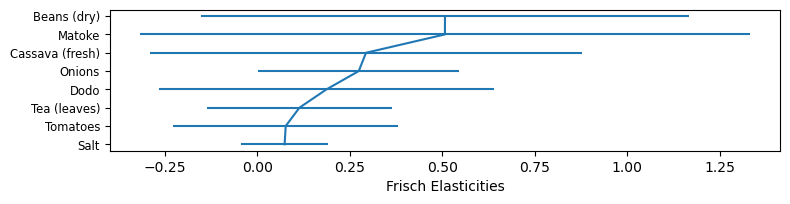

In [49]:
ax_filter_uganda = filter_result_uganda.graph_beta()

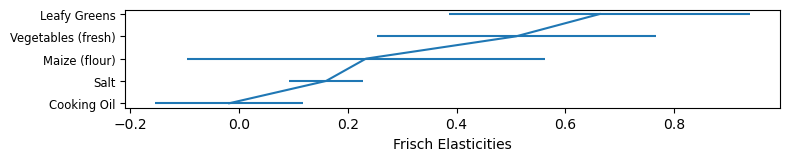

In [50]:
ax_filter_tanzania = filter_result_tanzania.graph_beta()

In [19]:
#beta_uganda = result_uganda.get_beta()

In [20]:
gamma_uganda = result_uganda.get_gamma()[["Females 51-99", "Males 51-99"]]
gamma_tanzania = result_tanzania.get_gamma()[["Females 51-99", "Males 51-99"]]
gamma_mali = result_mali.get_gamma()[["F 51+", "M 51+"]]
gamma_senegal = result_senegal.get_gamma()[["Females 51-99", "Males 51-99"]]

In [33]:
filter_gamma_uganda = filter_result_uganda.get_gamma()[["Females 51-99", "Males 51-99"]]
filter_gamma_tanzania = filter_result_tanzania.get_gamma()[["Females 51-99", "Males 51-99"]]

# Gamma Visualizations

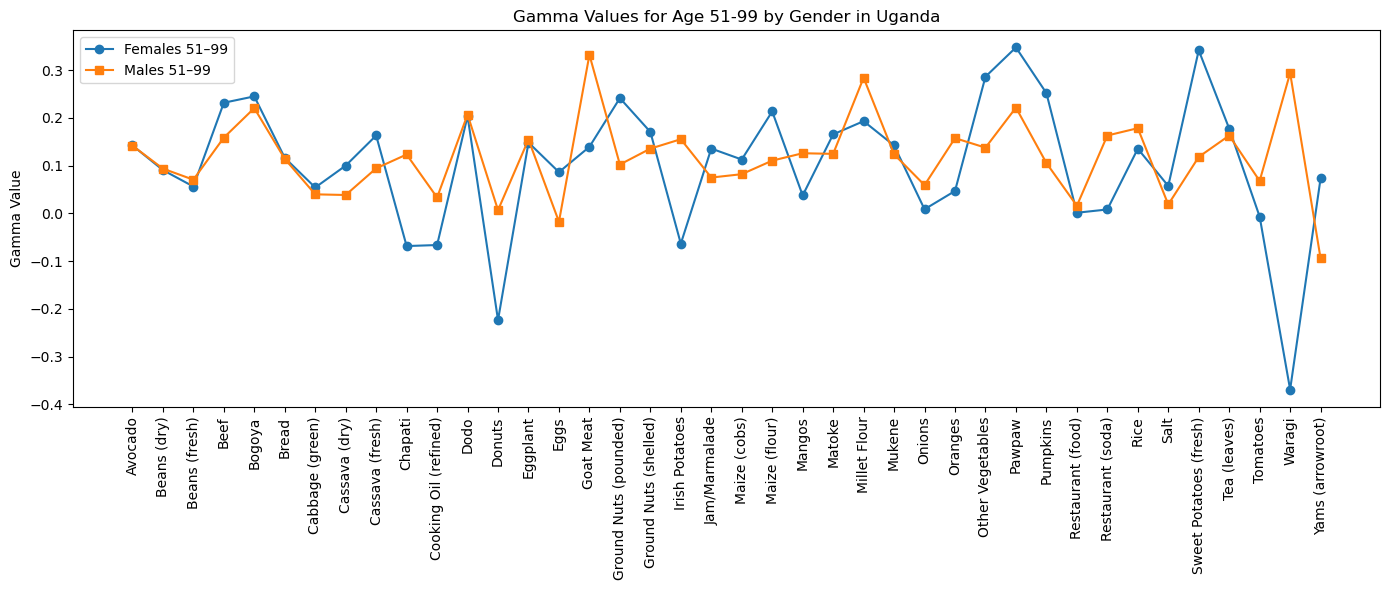

In [21]:
import matplotlib.pyplot as plot
plot.figure(figsize=(14, 6))
x = range(len(gamma_uganda))

plot.plot(x, gamma_uganda["Females 51-99"], marker='o', label="Females 51–99")
plot.plot(x, gamma_uganda["Males 51-99"], marker='s', label="Males 51–99")
plot.xticks(ticks=x, labels=gamma_uganda.index, rotation=90)

plot.ylabel("Gamma Value")
plot.title("Gamma Values for Age 51-99 by Gender in Uganda")
plot.legend()
plot.tight_layout()
plot.show()

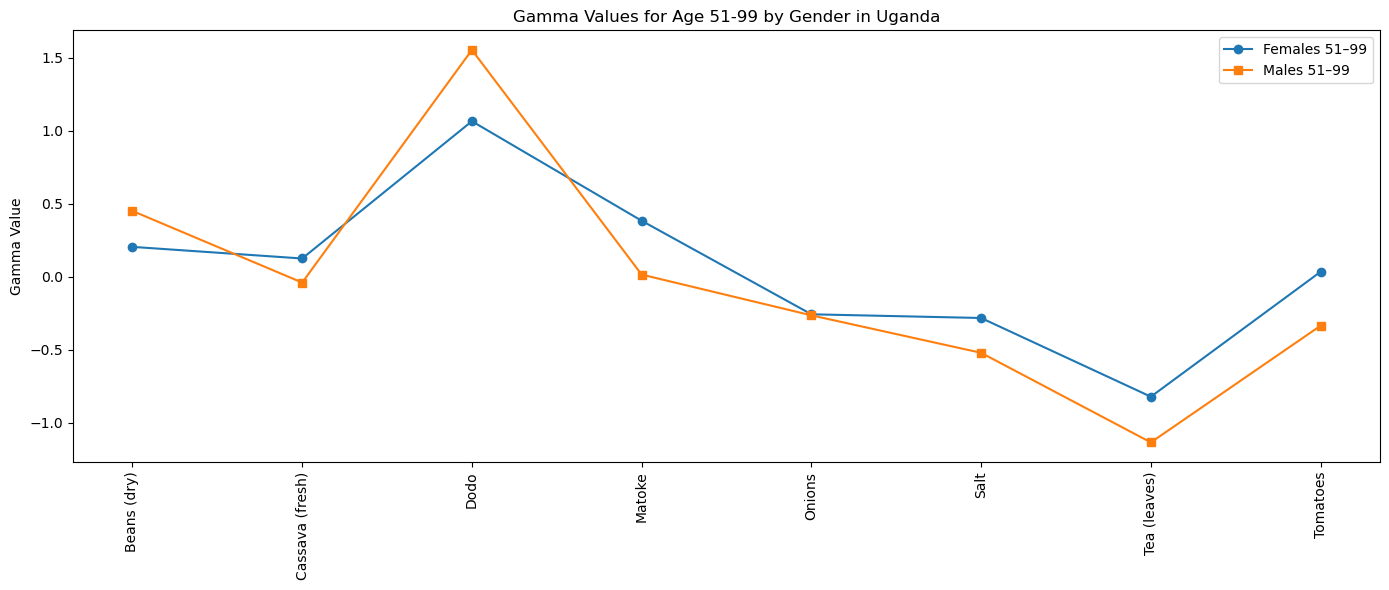

In [34]:
import matplotlib.pyplot as plot
plot.figure(figsize=(14, 6))
x = range(len(filter_gamma_uganda))

plot.plot(x, filter_gamma_uganda["Females 51-99"], marker='o', label="Females 51–99")
plot.plot(x, filter_gamma_uganda["Males 51-99"], marker='s', label="Males 51–99")
plot.xticks(ticks=x, labels=filter_gamma_uganda.index, rotation=90)

plot.ylabel("Gamma Value")
plot.title("Gamma Values for Age 51-99 by Gender in Uganda")
plot.legend()
plot.tight_layout()
plot.show()

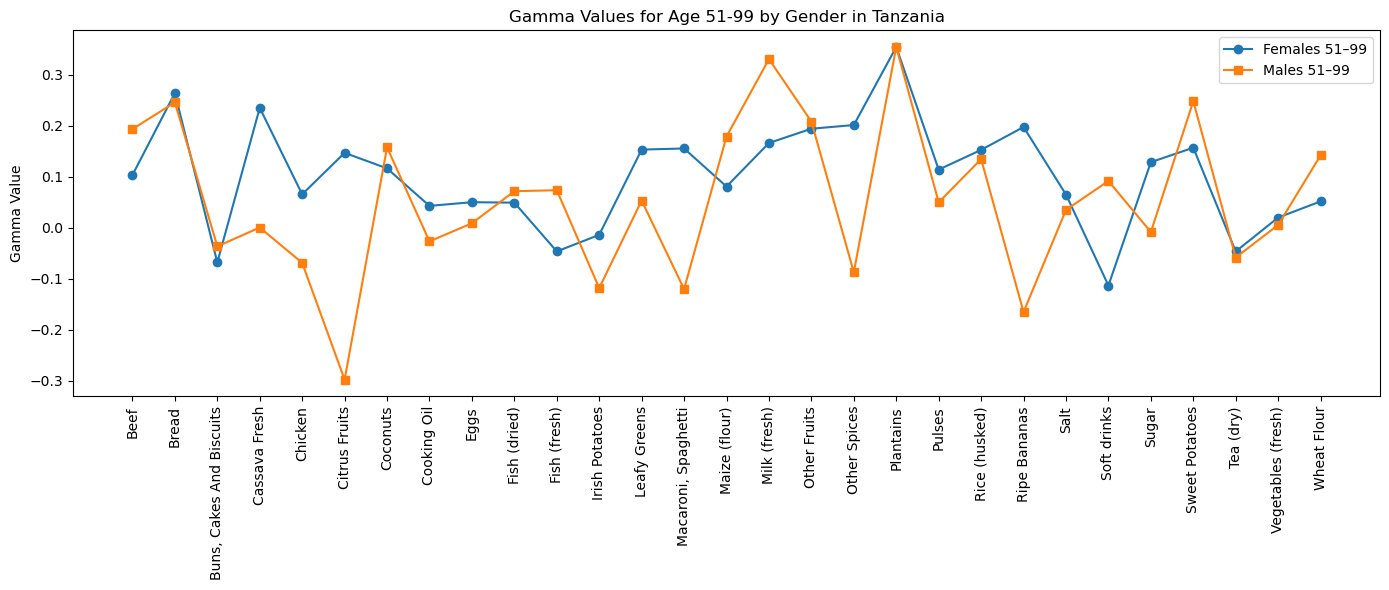

In [22]:
plot.figure(figsize=(14, 6))
x = range(len(gamma_tanzania))

plot.plot(x, gamma_tanzania["Females 51-99"], marker='o', label="Females 51–99")
plot.plot(x, gamma_tanzania["Males 51-99"], marker='s', label="Males 51–99")
plot.xticks(ticks=x, labels=gamma_tanzania.index, rotation=90)

plot.ylabel("Gamma Value")
plot.title("Gamma Values for Age 51-99 by Gender in Tanzania")
plot.legend()
plot.tight_layout()
plot.show()

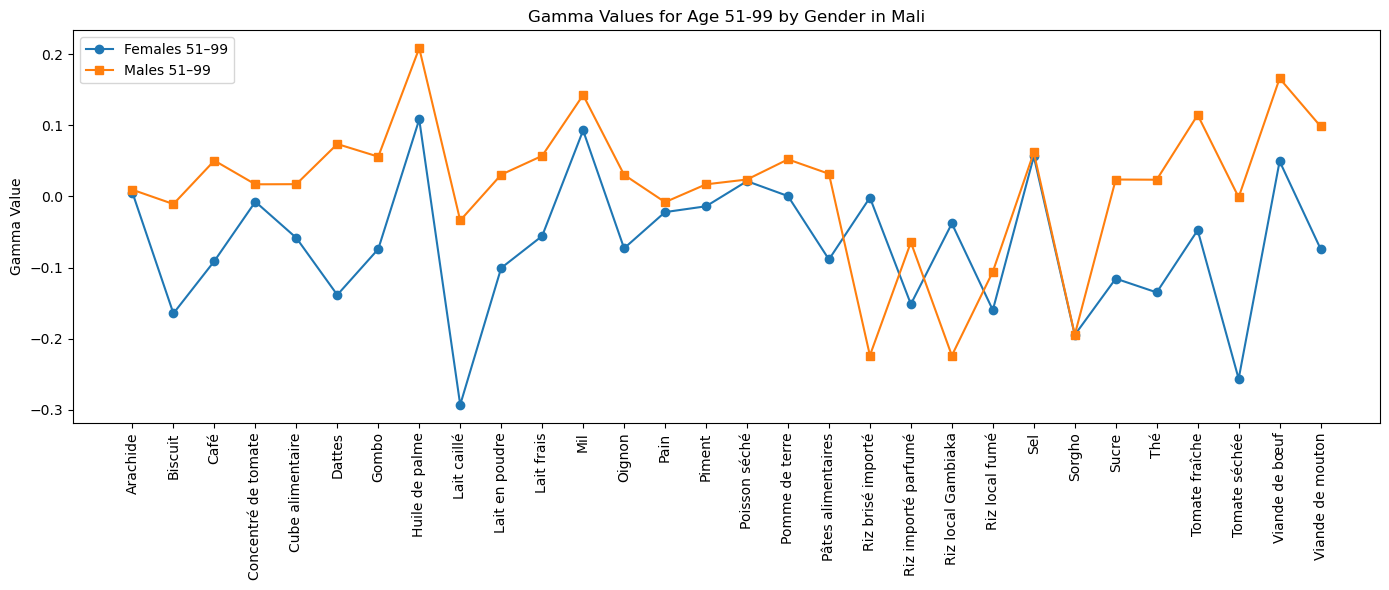

In [23]:
gamma_mali.columns = ["Females 51-99", "Males 51-99"]

plot.figure(figsize=(14, 6))
x = range(len(gamma_mali))

plot.plot(x, gamma_mali["Females 51-99"], marker='o', label="Females 51–99")
plot.plot(x, gamma_mali["Males 51-99"], marker='s', label="Males 51–99")
plot.xticks(ticks=x, labels=gamma_mali.index, rotation=90)

plot.ylabel("Gamma Value")
plot.title("Gamma Values for Age 51-99 by Gender in Mali")
plot.legend()
plot.tight_layout()
plot.show()

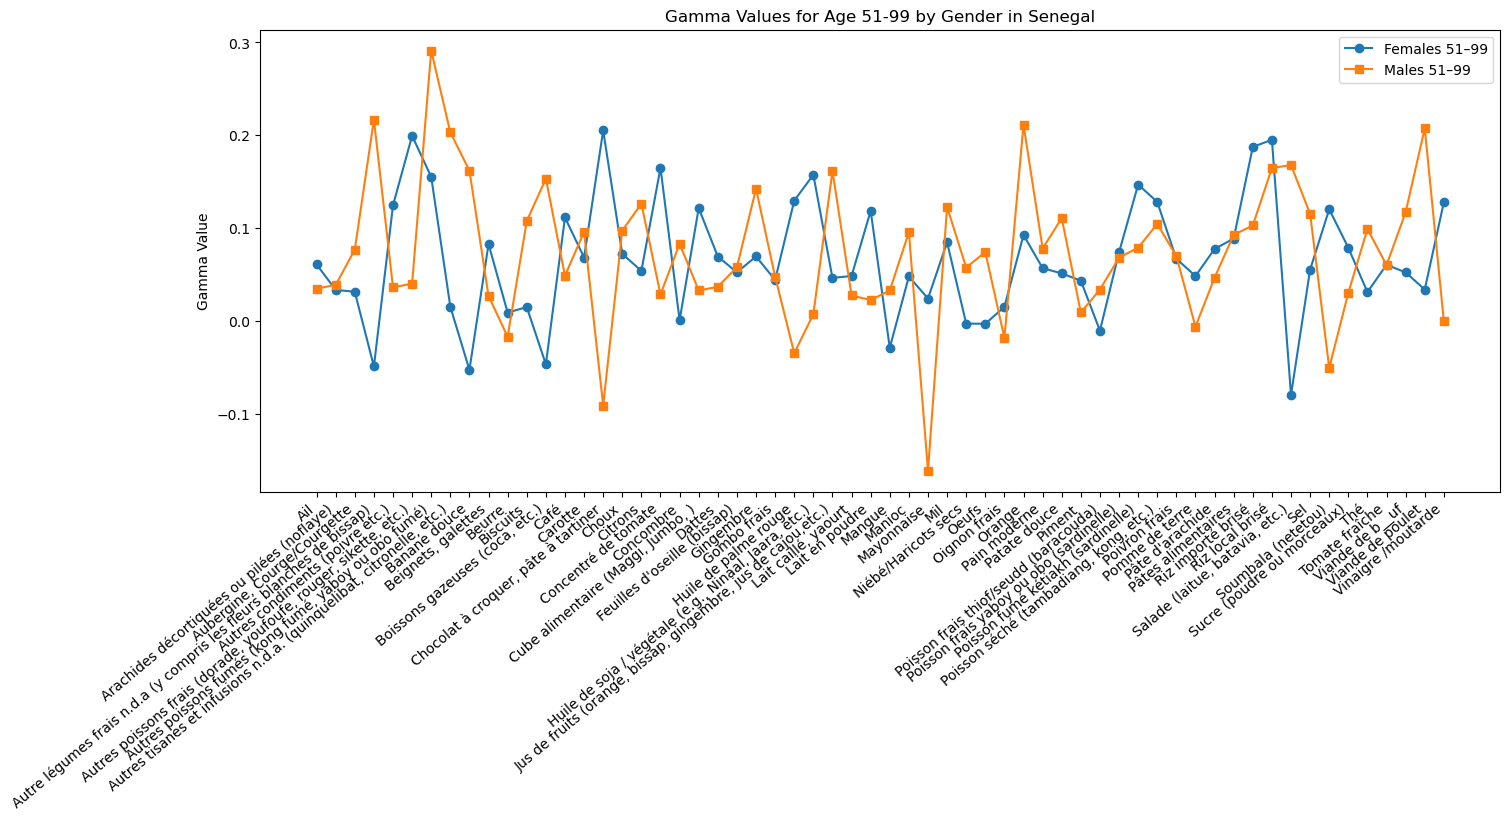

In [61]:
plot.figure(figsize=(16, 6))
x = range(len(gamma_senegal))

plot.plot(x, gamma_senegal["Females 51-99"], marker='o', label="Females 51–99")
plot.plot(x, gamma_senegal["Males 51-99"], marker='s', label="Males 51–99")
plot.xticks(ticks=x, labels=gamma_senegal.index, rotation=40, ha = "right")

plot.ylabel("Gamma Value")
plot.title("Gamma Values for Age 51-99 by Gender in Senegal")
plot.legend()
#plot.tight_layout()
plot.show()

In [25]:
def sort_gammas(df, gender):
    return df.reindex(df[gender].abs().sort_values(ascending=False).index)

def plot_top_gammas(df, column, title, top_n=10):
    df_top = df[column].abs().sort_values(ascending=False).head(top_n)
    actual_values = df.loc[df_top.index, column]

    plt.figure(figsize=(8, 5))
    actual_values.plot(kind='barh', color=actual_values.apply(lambda x: 'green' if x > 0 else 'red'))
    plt.gca().invert_yaxis()
    plt.title(title)
    plt.xlabel("Gamma Coefficient")
    plt.tight_layout()
    plt.show()

In [26]:
import matplotlib.pyplot as plt

gamma_sorted = {
    "senegal_f": sort_gammas(gamma_senegal, "Females 51-99"),
    "senegal_m": sort_gammas(gamma_senegal, "Males 51-99"),
    "uganda_f": sort_gammas(gamma_uganda, "Females 51-99"),
    "uganda_m": sort_gammas(gamma_uganda, "Males 51-99"),
    "tanzania_f": sort_gammas(gamma_tanzania, "Females 51-99"),
    "tanzania_m": sort_gammas(gamma_tanzania, "Males 51-99"),
    "mali_f": sort_gammas(gamma_mali, "Females 51-99"),
    "mali_m": sort_gammas(gamma_mali, "Males 51-99"),
}

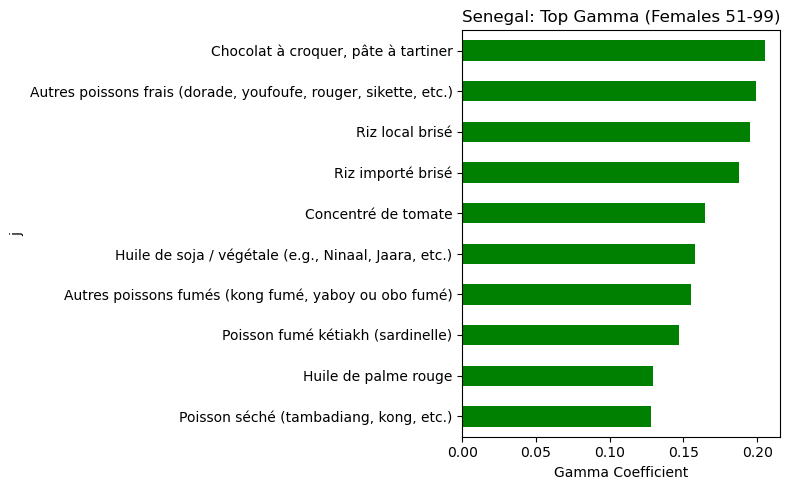

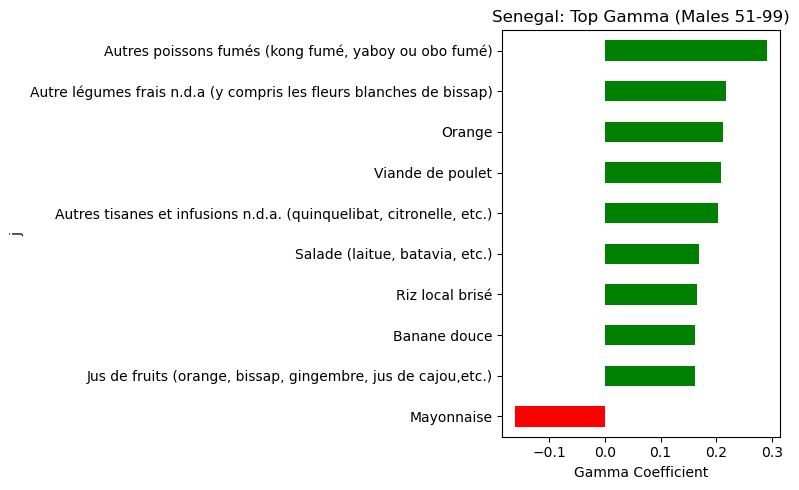

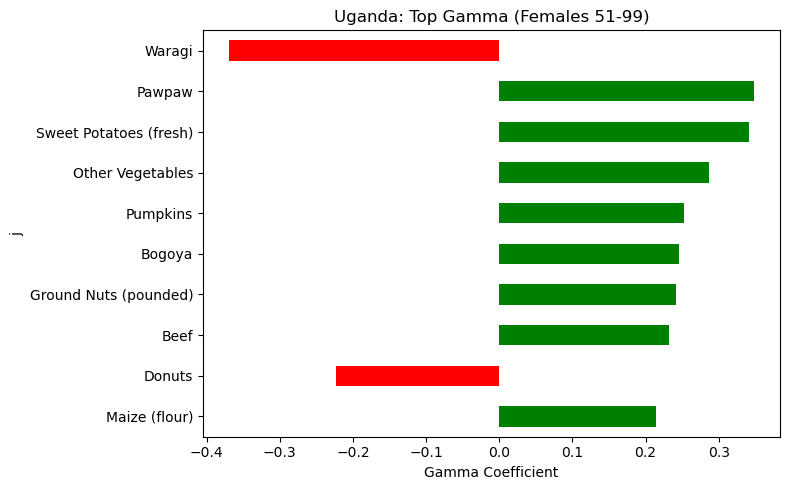

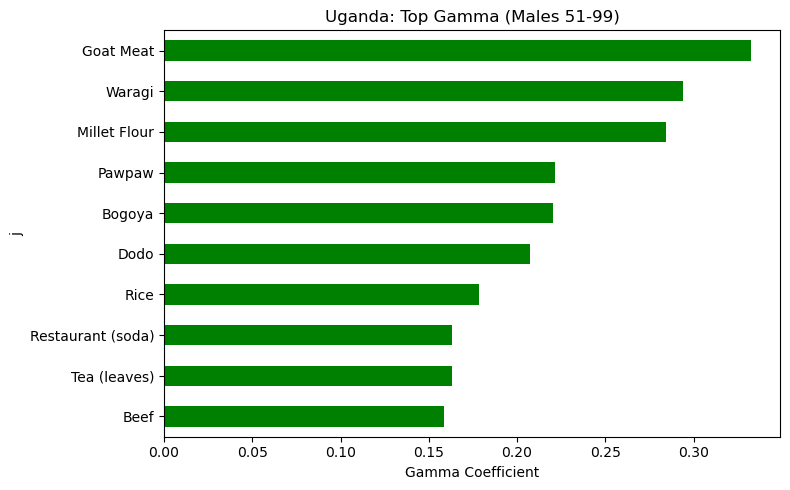

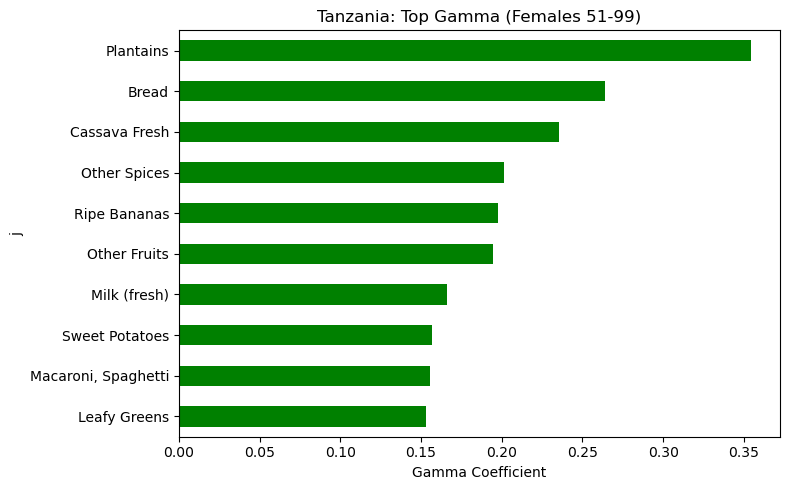

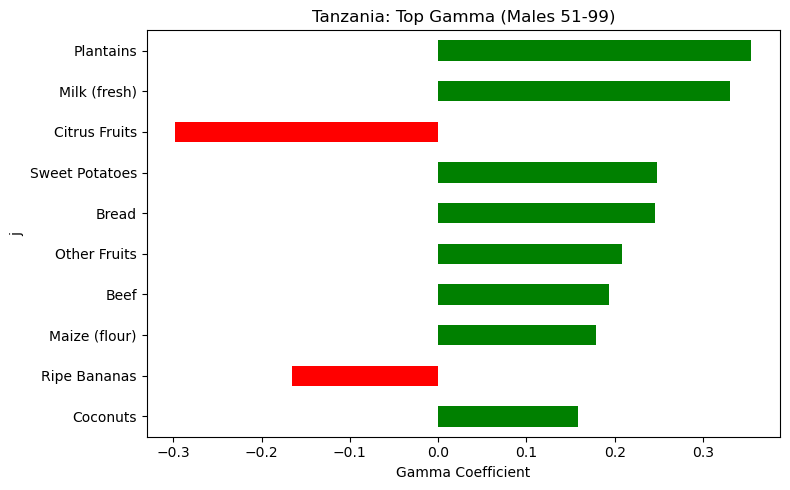

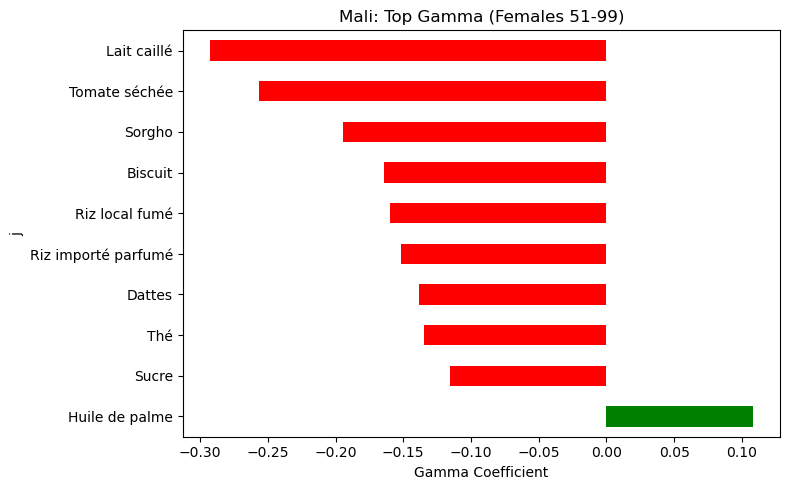

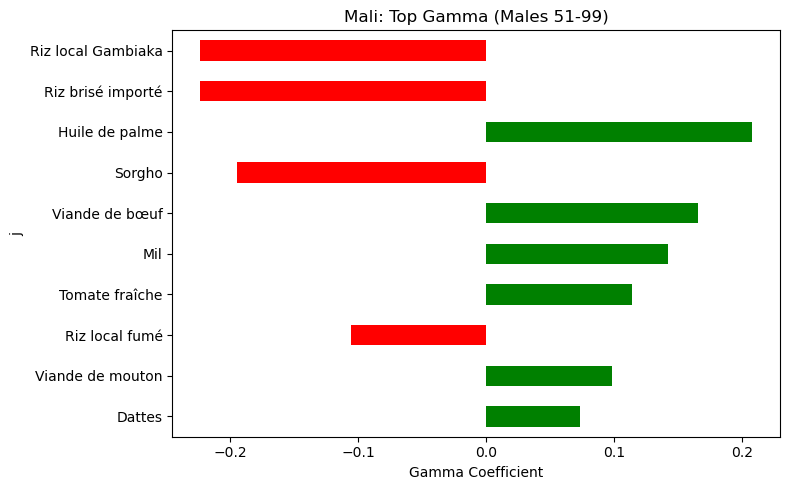

In [27]:
plot_top_gammas(gamma_sorted["senegal_f"], "Females 51-99", "Senegal: Top Gamma (Females 51-99)")
plot_top_gammas(gamma_sorted["senegal_m"], "Males 51-99", "Senegal: Top Gamma (Males 51-99)")

plot_top_gammas(gamma_sorted["uganda_f"], "Females 51-99", "Uganda: Top Gamma (Females 51-99)")
plot_top_gammas(gamma_sorted["uganda_m"], "Males 51-99", "Uganda: Top Gamma (Males 51-99)")

plot_top_gammas(gamma_sorted["tanzania_f"], "Females 51-99", "Tanzania: Top Gamma (Females 51-99)")
plot_top_gammas(gamma_sorted["tanzania_m"], "Males 51-99", "Tanzania: Top Gamma (Males 51-99)")

plot_top_gammas(gamma_sorted["mali_f"], "Females 51-99", "Mali: Top Gamma (Females 51-99)")
plot_top_gammas(gamma_sorted["mali_m"], "Males 51-99", "Mali: Top Gamma (Males 51-99)")
